## 합성곱 신경망

### 패션 MNIST CNN

- 

In [70]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [71]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [72]:
train_input.shape

(60000, 28, 28)

In [73]:
# 255.0 - 정규화 처리
# reshape(-1, 28, 28, 1) - 4차원 배열로 변경
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [74]:
train_scaled.shape

(60000, 28, 28, 1)

In [75]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [76]:
test_scaled.shape

(10000, 28, 28, 1)

- train_scaled에서 1차원을 더 추가한 이유
- channel 값 : 흑백이기 때문에 1채널만 있으면 됨
    - 60000(데이터 수), 28(이미지 넓이), 28(이미지 높이), 1(입력 채널)

In [77]:
## 훈련 세트, 검증세트 분리
train_scaled, val_sacled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [78]:
print(train_scaled.shape, val_sacled.shape)
print(train_target.shape, val_target.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)
(48000,) (12000,)


### 합성곱 신경망 만들기

In [79]:
model = keras.Sequential(name='CNN1')

# 32 -> 합성곱 층의 필터 갯수
# kernel_size, 3 -> (3 x 3)
# padding, same -> 패딩을 추가해서 특성맵사이즈를 원본과 동일하게
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [80]:
model.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
model.add(keras.layers.MaxPooling2D(2)) # 특성맵이 반으로 줄어듬. 14 x 14 사이즈의 특성맵

In [82]:
model.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
# 두번째 합성곱/풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation= 'relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 사이즈 반으로, 7x7x62 특성맵 -> 3136 출력

In [84]:
# 심층신명망을 붙임
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

#### 위에까지 학습을 위해 나눠놓은 것
- 아래에 다시 하나의 셀에 합침

In [85]:
model = keras.Sequential(name='CNN1')

# 32 -> 합성곱 층의 필터 갯수
# kernel_size, 3 -> (3 x 3)
# padding, same -> 패딩을 추가해서 특성맵사이즈를 원본과 동일하게
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1), name='Fisrt_CNN'))
model.add(keras.layers.MaxPooling2D(2, name='First_Pooling')) # 특성맵이 반으로 줄어듬. 14 x 14 사이즈의 특성맵

# 두번째 합성곱/풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation= 'relu', padding='same', name='Second_CNN'))
model.add(keras.layers.MaxPooling2D(2, name='Second_Pooling')) # 사이즈 반으로, 7x7x62 특성맵 -> 3136 출력

# 심층신명망을 붙임
model.add(keras.layers.Flatten(name='Flatten'))
model.add(keras.layers.Dense(100, activation='relu', name='Hidden'))
model.add(keras.layers.Dropout(0.4, name='Dropout'))
model.add(keras.layers.Dense(10, activation='softmax', name='Output'))

In [86]:
model.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Fisrt_CNN (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 First_Pooling (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 Second_CNN (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 Second_Pooling (MaxPooling  (None, 7, 7, 64)          0         
 2D)                                                             
                                                                 
 Flatten (Flatten)           (None, 3136)              0         
                                                                 
 Hidden (Dense)              (None, 100)               313700 

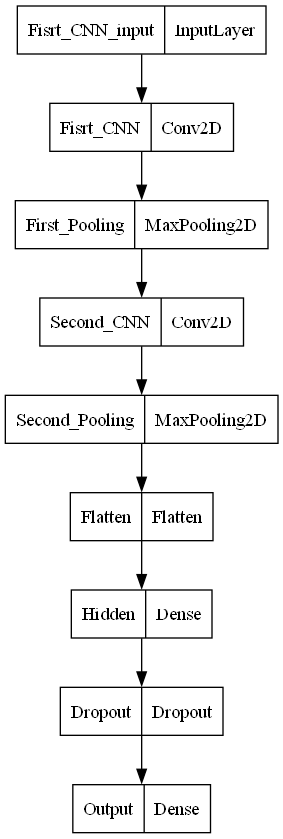

In [87]:
# 모델 시각화
keras.utils.plot_model(model)

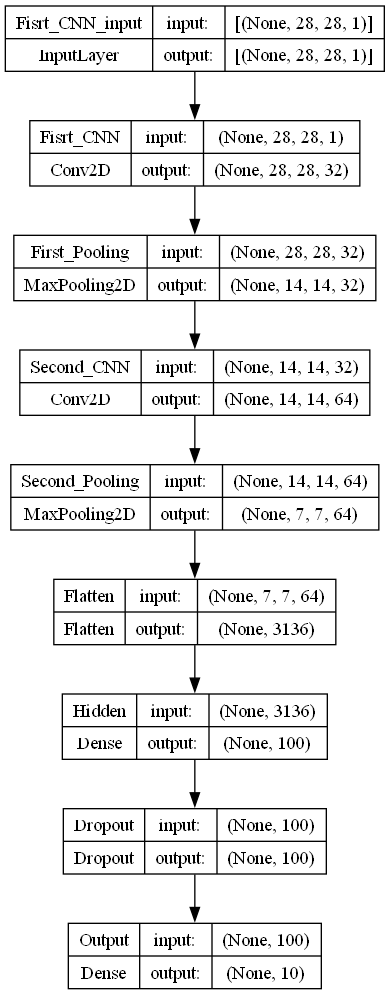

In [88]:
## 상세 모델 시각화 
keras.utils.plot_model(model, show_shapes=True)

- graphviz 설치 및
- pydot 파이썬 모듈 설치
- VS Code 재시작

In [89]:
!pip install pydot


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 모델 컴파일, 훈련

In [90]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [91]:
# 모델 훈련
history = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_sacled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5187 - accuracy: 0.8128 - val_loss: 0.3272 - val_accuracy: 0.8798
Epoch 2/50
  17/1500 [..............................] - ETA: 10s - loss: 0.4127 - accuracy: 0.8493

c:\Source\IOT-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 12s 8ms/step - loss: 0.3478 - accuracy: 0.8760 - val_loss: 0.2831 - val_accuracy: 0.8939
Epoch 3/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3007 - accuracy: 0.8916 - val_loss: 0.2616 - val_accuracy: 0.9037
Epoch 4/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2674 - accuracy: 0.9018 - val_loss: 0.2370 - val_accuracy: 0.9105
Epoch 5/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2431 - accuracy: 0.9119 - val_loss: 0.2326 - val_accuracy: 0.9143
Epoch 6/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2230 - accuracy: 0.9174 - val_loss: 0.2307 - val_accuracy: 0.9160
Epoch 7/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2049 - accuracy: 0.9234 - val_loss: 0.2162 - val_accuracy: 0.9222
Epoch 8/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1906 - accuracy: 0.9295 - val_loss: 0.2168 - val_accuracy: 0.9

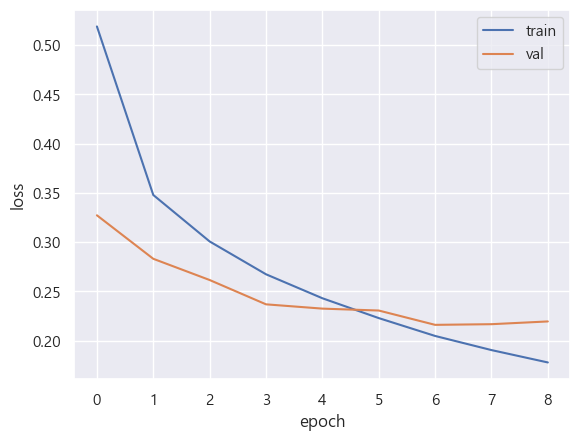

In [92]:
# 정확도 확인
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [93]:
# 모델 검증정확도
model.evaluate(val_sacled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2162 - accuracy: 0.9222


[0.2161547839641571, 0.922249972820282]

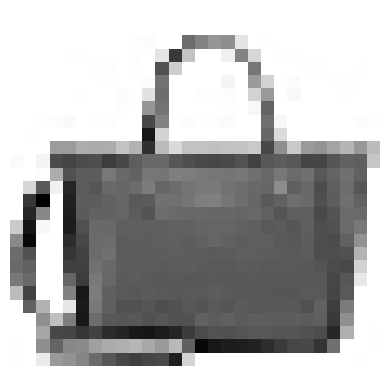

In [94]:
# val_scaled[0]

plt.imshow(val_sacled[0].reshape(28,28), cmap='gray_r')
plt.axis('off')
plt.show()

In [95]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [96]:
model.predict(val_sacled[0:1].round(3))

1/1 [==============================] - 0s 62ms/step


array([[2.0616912e-14, 2.3696909e-21, 1.3084371e-15, 1.8432220e-15,
        3.7693712e-15, 1.2671614e-13, 3.1805542e-14, 1.4549063e-14,
        1.0000000e+00, 2.4622849e-13]], dtype=float32)

예측 시각화

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [98]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [99]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [100]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 1s 2ms/step


In [101]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]

    #plt.title(f'실제: {true_label}, 예측: {pred_label}')
    plt.text(0, -6, f'실제: {true_label}', fontsize=12, color='blue')
    plt.text(0, -3, f'예측: {pred_label}', fontsize=12, color='red', fontweight='bold')

    plt.axis('off')
    plt.show()

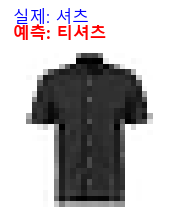

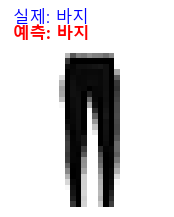

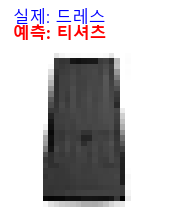

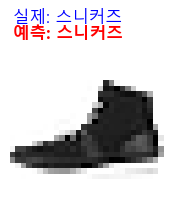

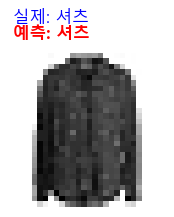

In [102]:
for i in range(40,45):
    show_image(i)

In [103]:
## 테스트세트로 검증
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2376 - accuracy: 0.9107


[0.2375679463148117, 0.9107000231742859]

저장한 모델 로드


In [104]:
model2 = keras.models.load_model('./best-cnn-model.h5')

In [105]:
model2.layers

In [106]:
model2.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Fisrt_CNN (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 First_Pooling (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 Second_CNN (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 Second_Pooling (MaxPooling  (None, 7, 7, 64)          0         
 2D)                                                             
                                                                 
 Flatten (Flatten)           (None, 3136)              0         
                                                                 
 Hidden (Dense)              (None, 100)               313700 

In [107]:
# 모델 입력값 확인
model2.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'Fisrt_CNN_input')>

In [108]:
model2.layers[0].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'Fisrt_CNN')>

#### 특성맵 시각화

ValueError: 'gray_y' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'vanimo', 'vanimo_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

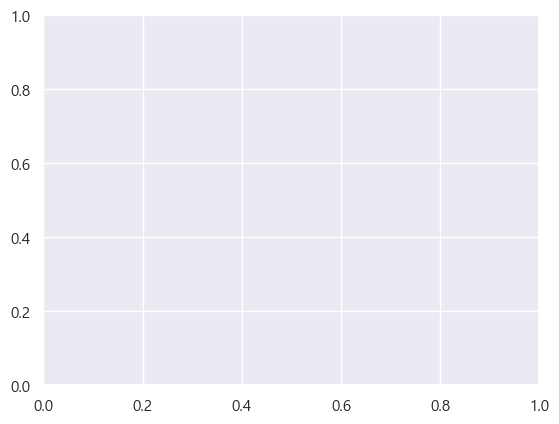

In [109]:
plt.imshow(train_input[0], cmap='gray_y')
plt.axis('off')
plt.show()

In [ ]:
# 전체 모델에서 첫번째 합송 곱 레이터만 떼서 모델로 생성
model2_first_layer = keras.Model(model2.input, model2.layers[0].output)

In [ ]:
model2_first_layer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Fisrt_CNN_input (InputLaye  [(None, 28, 28, 1)]       0         
 r)                                                              
                                                                 
 Fisrt_CNN (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
# 훈련세트 1번째 앵클부츠로 특성맵 생성
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = model2_first_layer.predict(inputs)

1/1 [==============================] - 0s 18ms/step


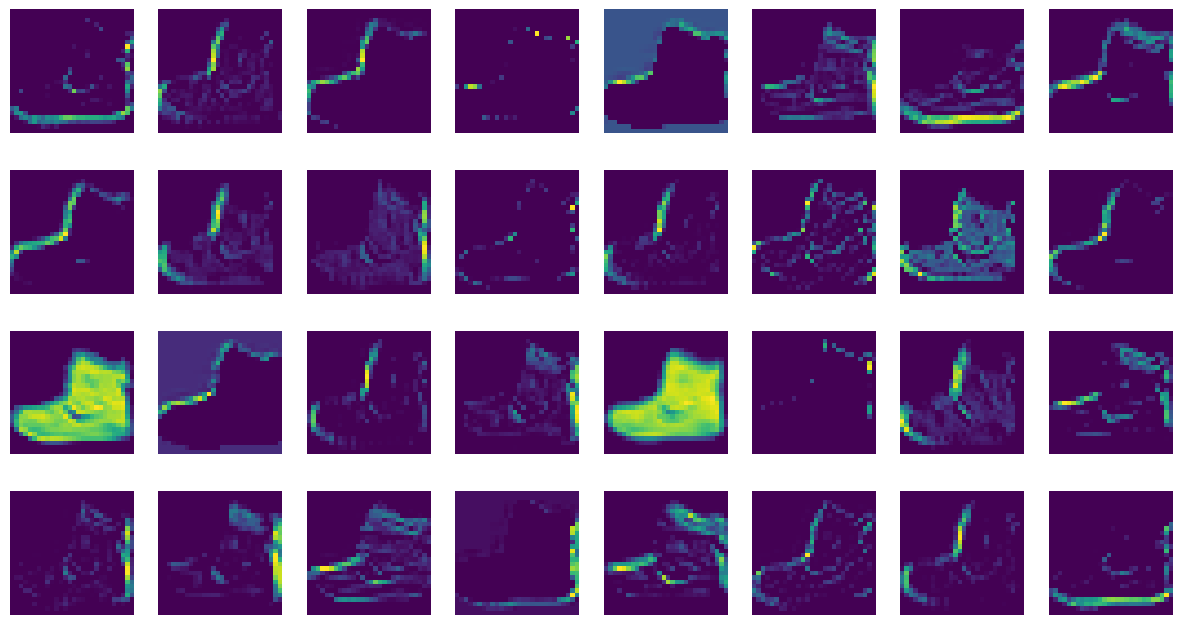

In [112]:
fig, axs = plt.subplots(4, 8 , figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:, i*8 + j], cmap='viridis')
        axs[i, j].axis('off')

plt.show()

- 위는 첫번째 합성곱을 통과한 앵클부츠의 결과화면

#### 결론
- 일반신경망이나 심층신경망으로 훈련했을 때보다 정확도가 높아짐
- 심층신경망 : 대략 88%
- 합성곱신경망 : 대략 92%

##### 머신러닝/딥러닝 프레임워크 종류
- 사이킷 런 : 머신러닝에 특화된 프레임워크
    - 몇 기능은 다른 프레임워크에 없어서 같이 사용중
    
- 텐서플로 / 케라스 : 구글 개발 머신러닝 프레임워크
- 파이토치 : 페이스북(메타) 개발 머신러닝 프레임워크 
- fastai : 파이토치 기반으로 된 머신러닝 프레임워크
- JAX : 구글 개발 최첨단 연구용 딥러닝 프레임워크
- MXBet: 아마존 개발